# Customer Satisfaction Analysis with Python

In [4]:
import pandas as pd

data = pd.read_csv("C:/Lokesh/Projects for Resume/Customer Satisfaction Case Study/E-commerce_NPA_Dataset.csv")

print(data.head())

   CustomerID  Age  Gender  PurchaseAmount  PurchaseFrequency  \
0           1   38  Female      749.097626                 24   
1           2   30    Male      735.224916                 18   
2           3   55    Male     1145.520305                 22   
3           4   39  Female      925.460535                 14   
4           5   51    Male      108.359916                  9   

   ProductQualityRating  DeliveryTimeRating  CustomerServiceRating  \
0                     2                   1                      3   
1                     5                   4                      4   
2                     3                   5                      4   
3                     4                   3                      2   
4                     3                   3                      2   

   WebsiteEaseOfUseRating  ReturnRate  DiscountUsage LoyaltyProgramMember  
0                       5        0.12     135.392573                   No  
1                       5        0.3

In [2]:
print(data.describe())

       CustomerID         Age  PurchaseAmount  PurchaseFrequency  \
count  500.000000  500.000000      500.000000         500.000000   
mean   250.500000   44.170000     1065.050731          14.308000   
std    144.481833   14.813777      583.199658           8.151197   
min      1.000000   18.000000       51.799790           1.000000   
25%    125.750000   32.000000      535.083407           7.000000   
50%    250.500000   44.000000     1100.884065          14.000000   
75%    375.250000   58.000000     1584.348124          22.000000   
max    500.000000   69.000000     1999.655968          29.000000   

       ProductQualityRating  DeliveryTimeRating  CustomerServiceRating  \
count             500.00000          500.000000               500.0000   
mean                2.93400            3.008000                 3.0780   
std                 1.41054            1.372481                 1.4156   
min                 1.00000            1.000000                 1.0000   
25%              

#The summary statistics provide insights into the central tendency, dispersion, and range of the numeric data. Here are some key observations:

 - Age: The average customer age is around 44 years, with a range from 18 to 69 years.
 - Purchase Amount: The average purchase amount is $1065, with a significant standard deviation indicating variability in spending.
 - Purchase Frequency: Customers purchase on average about 14 times, with some making up to 29 purchases.
 - Ratings: The average ratings for product quality, delivery time, customer service, and website ease of use are around 3, indicating moderatesatisfaction levels. These ratings range from 1 (poor) to 5 (excellent).
 - Return Rate: The average return rate is 25%, with some customers having a return rate as high as 50%.
 - Discount Usage: The average discount usage is around $251, with high variability.

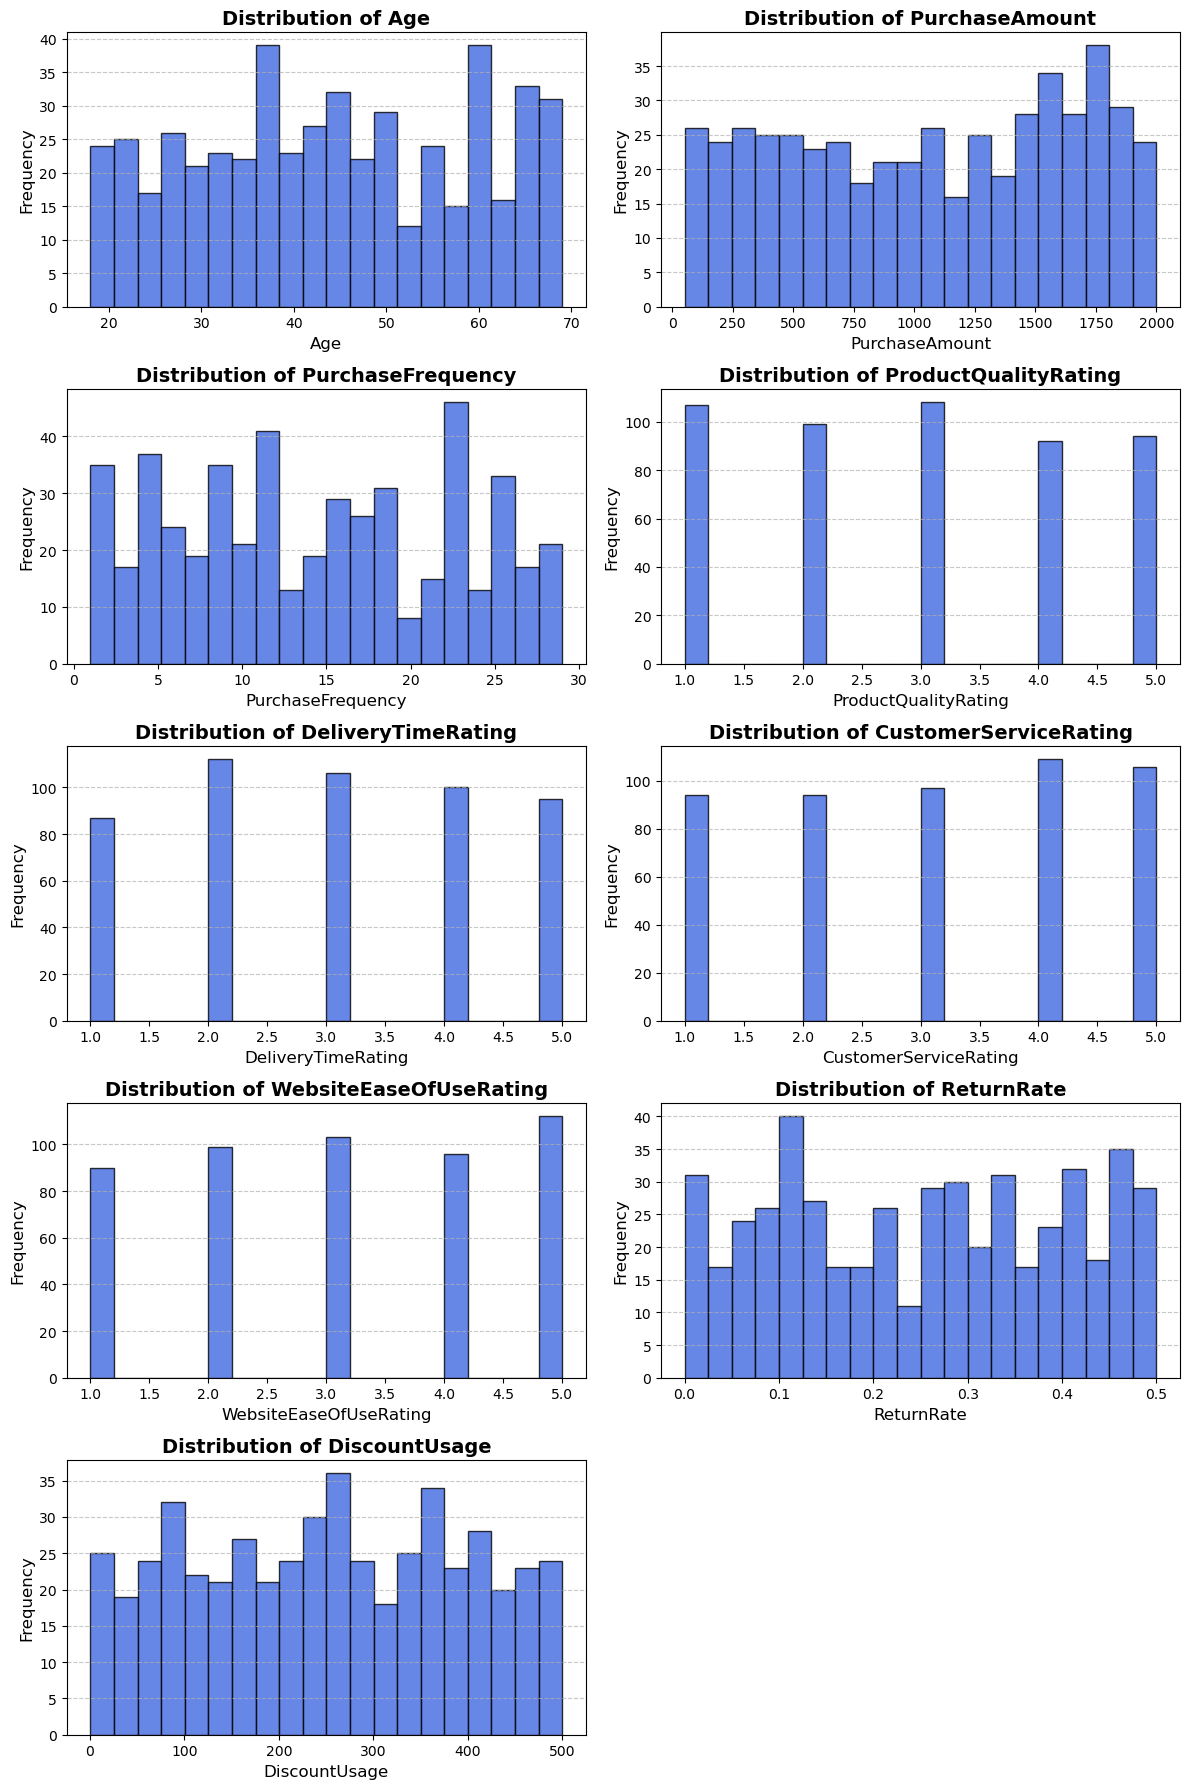

In [5]:
import matplotlib.pyplot as plt

# List of numeric columns
numeric_cols = ['Age', 'PurchaseAmount', 'PurchaseFrequency', 'ProductQualityRating', 
                'DeliveryTimeRating', 'CustomerServiceRating', 'WebsiteEaseOfUseRating', 
                'ReturnRate', 'DiscountUsage']

# Set figure size
plt.figure(figsize=(12, 18))

# Loop through columns and create histograms
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(5, 2, i)
    plt.hist(data[col], bins=20, color="royalblue", edgecolor='black', alpha=0.8)
    plt.title(f'Distribution of {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add subtle gridlines

# Adjust layout
plt.tight_layout()
plt.show()


The histograms reveal several insights into customer demographics and satisfaction metrics:

- the age distribution is relatively even with slight peaks in the 30s and 60s;
- purchase amounts are right-skewed, indicating most customers spend less than $1000;
- purchase frequency is varied, with notable peaks around 10 and 20 purchases;
- satisfaction ratings for product quality, delivery time, customer service, and website ease of use show a wide distribution, with most ratings ---clustering around the middle values;
- return rates are varied with peaks around 0.1 and 0.4;
- and discount usage is evenly spread, showing no significant trend.

These findings suggest that customer experiences and behaviours are diverse, with varying levels of satisfaction across different service aspects.

Now, let’s segment the customers based on demographic and behavioral factors, and analyze their satisfaction ratings. We’ll create segments based on age, gender, and loyalty program membership. First, let’s analyze satisfaction ratings across different age groups and genders:

In [8]:
# create age groups
bins = [18, 30, 40, 50, 60, 70]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# select only the numeric columns for calculation
numeric_columns = ['ProductQualityRating', 'DeliveryTimeRating', 'CustomerServiceRating', 'WebsiteEaseOfUseRating']

# calculate mean ratings by age group and gender
mean_ratings_age_gender = data.groupby(['AgeGroup', 'Gender'])[numeric_columns].mean()

# reset the index to display the dataframe
mean_ratings_age_gender.reset_index(inplace=True)
print(mean_ratings_age_gender)

  AgeGroup  Gender  ProductQualityRating  DeliveryTimeRating  \
0    18-29  Female              3.052632            3.210526   
1    18-29    Male              2.933333            3.000000   
2    30-39  Female              2.929825            2.859649   
3    30-39    Male              3.080000            2.820000   
4    40-49  Female              3.090909            2.890909   
5    40-49    Male              2.857143            3.166667   
6    50-59  Female              2.945946            2.945946   
7    50-59    Male              2.833333            2.895833   
8    60-69  Female              2.900000            3.300000   
9    60-69    Male              2.673469            2.938776   

   CustomerServiceRating  WebsiteEaseOfUseRating  
0               3.175439                2.912281  
1               3.333333                3.355556  
2               2.912281                3.070175  
3               2.980000                2.880000  
4               3.036364                

C:\Users\Lokeshsaroj\AppData\Local\Temp\ipykernel_24136\1623183002.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_ratings_age_gender = data.groupby(['AgeGroup', 'Gender'])[numeric_columns].mean()


The data shows mean satisfaction ratings by age group and gender for different aspects of service. Here are some insights:

- Younger customers (18-29) generally rate product quality slightly higher.
- Females in the 40-49 age group give the highest ratings, while males in the 60-69 age group give the lowest.
- Delivery time satisfaction is relatively consistent across age groups, with minor variations.
- The highest ratings for delivery time satisfaction are from females aged 60-69, while the lowest are from males aged 30-39.
- Customer service ratings are fairly consistent, with a slight peak among younger males (18-29).
- Males in the 60-69 age group rate customer service the lowest.

Next, let’s analyze the impact of loyalty program membership on customer satisfaction:


In [10]:
# select only the numeric columns for calculation
numeric_columns = ['ProductQualityRating', 'DeliveryTimeRating', 'CustomerServiceRating', 'WebsiteEaseOfUseRating', 'ReturnRate', 'DiscountUsage']

# calculate mean ratings by loyalty program membership
mean_ratings_loyalty = data.groupby('LoyaltyProgramMember')[numeric_columns].mean()

# reset the index to display the dataframe
mean_ratings_loyalty.reset_index(inplace=True)
print(mean_ratings_loyalty)

  LoyaltyProgramMember  ProductQualityRating  DeliveryTimeRating  \
0                   No              2.920502            2.916318   
1                  Yes              2.946360            3.091954   

   CustomerServiceRating  WebsiteEaseOfUseRating  ReturnRate  DiscountUsage  
0               2.987448                3.108787    0.251883     241.426710  
1               3.160920                3.057471    0.252644     260.113108  


The data shows mean satisfaction ratings, return rates, and discount usage for loyalty program members versus non-members. Here are the insights:

- Product Quality Rating: Loyalty program members rate product quality slightly higher (2.95) compared to non-members (2.92).
- Delivery Time Rating: Loyalty program members are more satisfied with delivery time (3.09) than non-members (2.92).
- Customer Service Rating: Members rate customer service higher (3.16) compared to non-members (2.99).
- Website Ease of Use Rating: Non-members rate the website slightly higher (3.11) than members (3.06).
- Return Rate: The return rates are almost identical between members (0.25) and non-members (0.25).
- Discount Usage: Members use slightly more discounts ($260) compared to non-members ($241).

# Net Promoter Score
Now, let’s calculate the Net Promoter Score. NPS is a metric used to gauge customer loyalty and satisfaction by asking customers how likely they are to recommend a company’s product or service to others on a scale of 0 to 10. Respondents are classified into three categories:

- Promoters (9-10)
- Passives (7-8)
- Detractors (0-6)

The NPS is calculated by subtracting the percentage of Detractors from the percentage of Promoters. A higher NPS indicates more customer loyalty and positive word-of-mouth, which are critical for business growth.

To calculate the NPS, we will use customer service ratings as a proxy for overall satisfaction. Here’s how to calculate NPS:

In [13]:
# define NPS categories based on customer service rating
data['NPS_Category'] = pd.cut(data['CustomerServiceRating'], bins=[0, 6, 8, 10], labels=['Detractors', 'Passives', 'Promoters'], right=False)

# calculate NPS
nps_counts = data['NPS_Category'].value_counts(normalize=True) * 100
nps_score = nps_counts['Promoters'] - nps_counts['Detractors']

nps_counts

NPS_Category
Detractors    100.0
Passives        0.0
Promoters       0.0
Name: proportion, dtype: float64

The NPS calculation shows:

- Detractors: 100% of customers fall into the Detractors category.
- Passives: 0%
- Promoters: 0%

This results in an NPS score of -100, which indicates extremely low customer satisfaction. This score is a critical indicator that significant improvements are needed in customer service to convert detractors into promoters.

Root Cause Analysis for Low Satisfaction
Now, we will perform a root cause analysis on customer dissatisfaction by identifying the key factors contributing to low ratings in specific areas such as product quality, delivery time, customer service, and website ease of use. We’ll analyze the characteristics of customers who provide low ratings and look for patterns that can help us understand the root causes of dissatisfaction.

We can perform root cause analysis for low ratings by identifying the customers with low ratings and analyzing the characteristics of these customers. We’ll create subsets of the data where ratings are low (1 or 2) for product quality, delivery time, customer service, and website ease of use:

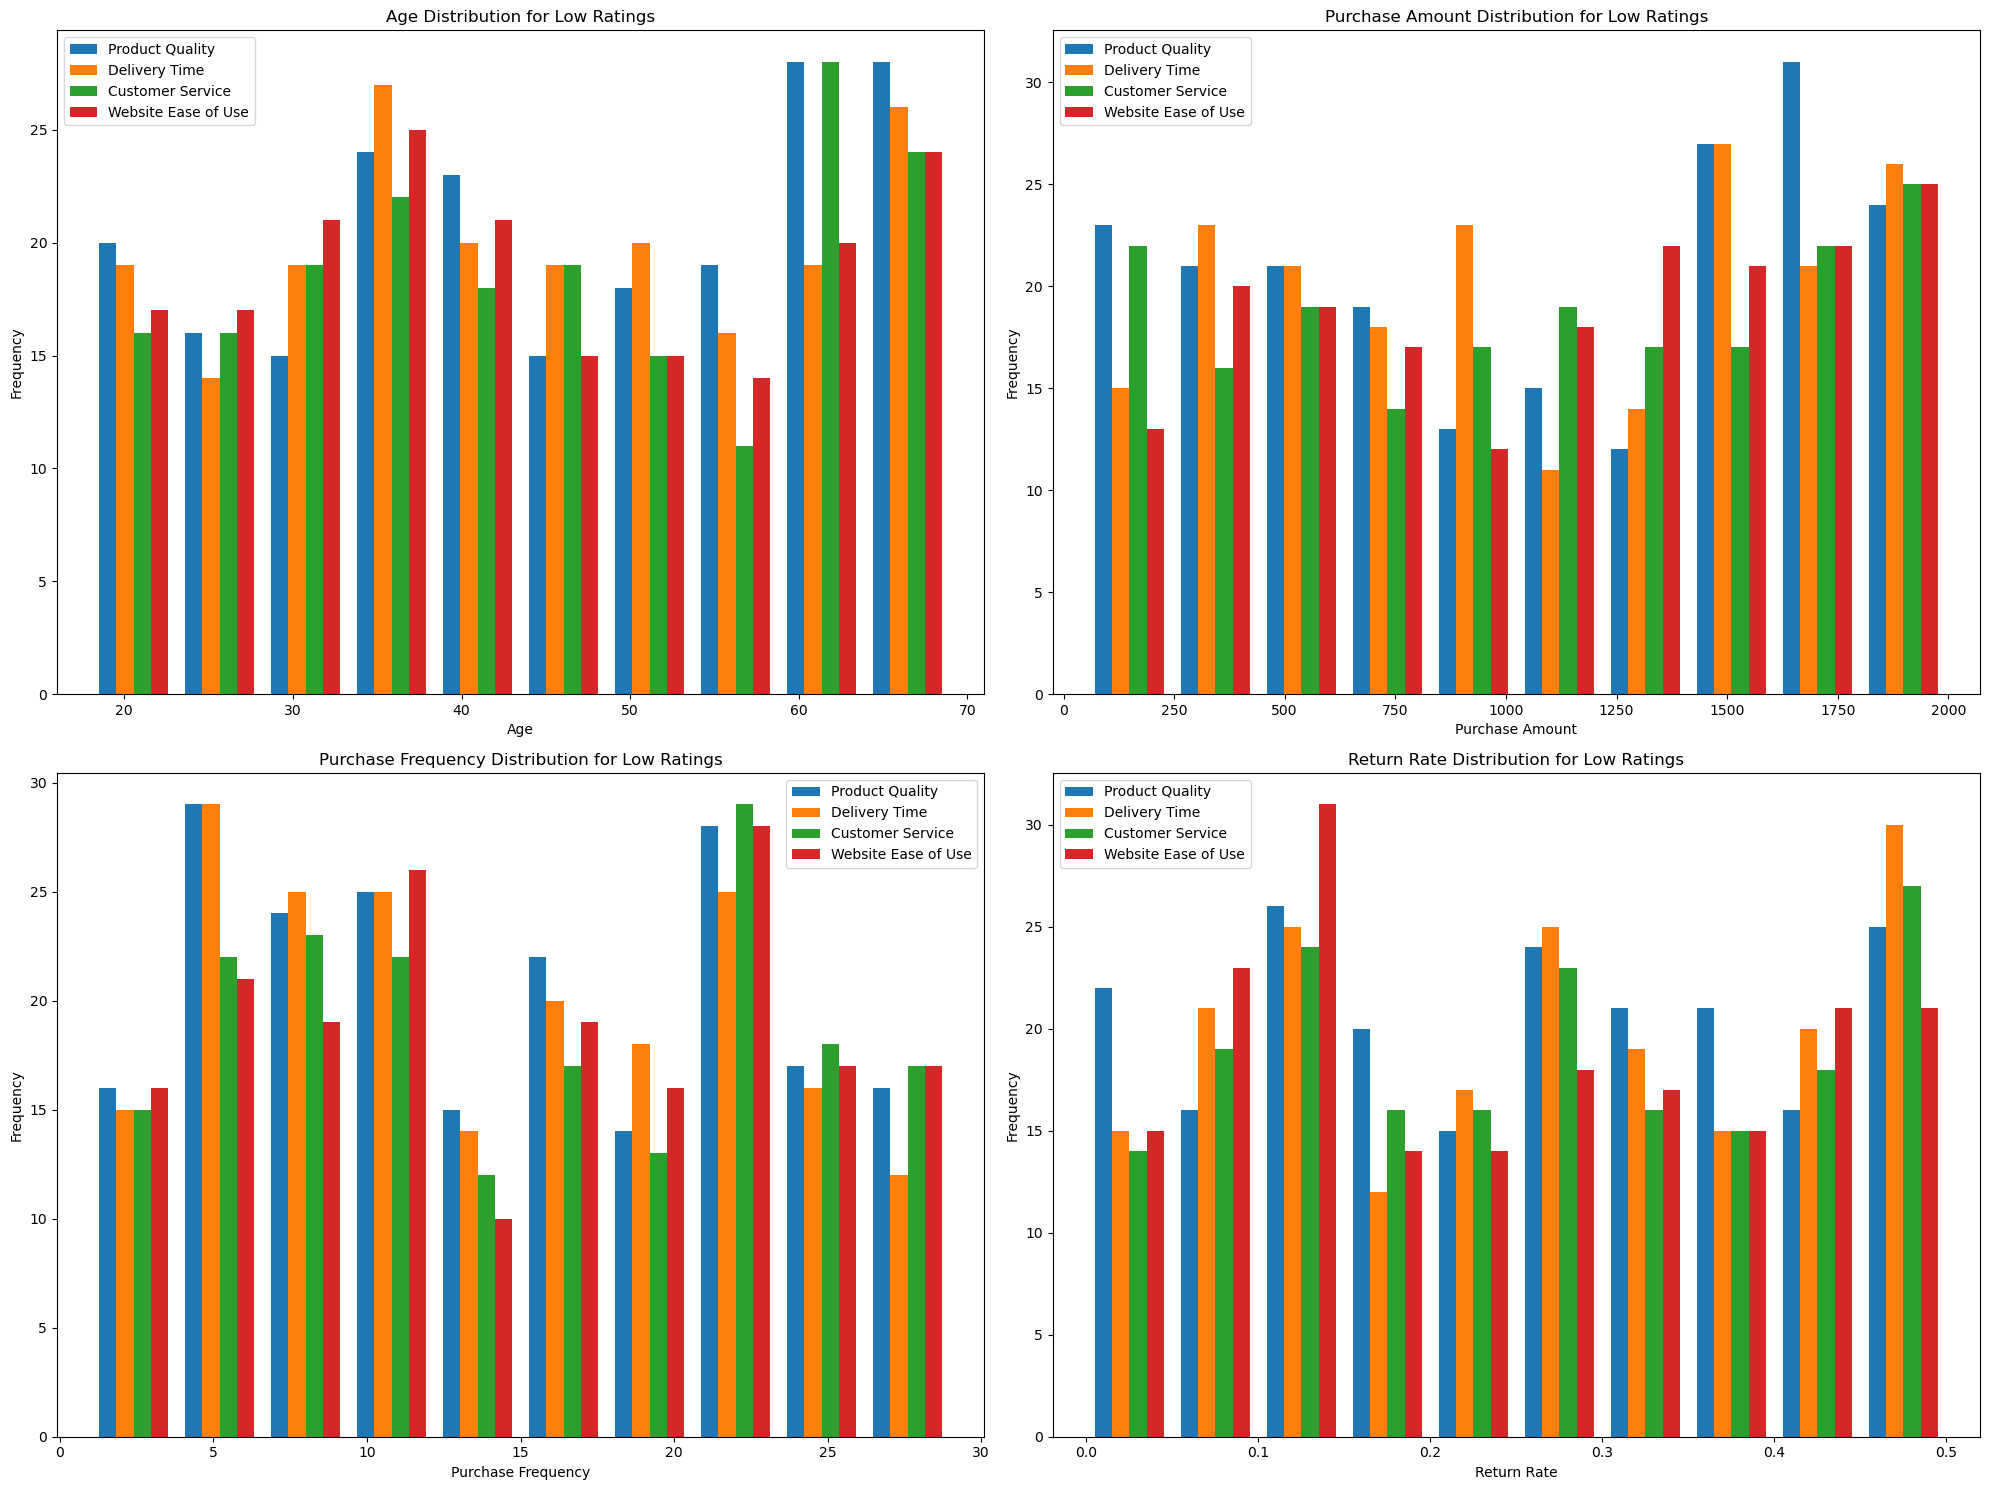

In [15]:
# define low rating threshold
low_rating_threshold = 2

# create subsets for low ratings in different aspects
low_product_quality = data[data['ProductQualityRating'] <= low_rating_threshold]
low_delivery_time = data[data['DeliveryTimeRating'] <= low_rating_threshold]
low_customer_service = data[data['CustomerServiceRating'] <= low_rating_threshold]
low_website_ease_of_use = data[data['WebsiteEaseOfUseRating'] <= low_rating_threshold]

# plot the characteristics for each low rating subset
plt.figure(figsize=(20, 15))

# age distribution for low ratings
plt.subplot(2, 2, 1)
plt.hist([low_product_quality['Age'], low_delivery_time['Age'], low_customer_service['Age'], low_website_ease_of_use['Age']], bins=10, label=['Product Quality', 'Delivery Time', 'Customer Service', 'Website Ease of Use'])
plt.title('Age Distribution for Low Ratings')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

# purchase amount distribution for low ratings
plt.subplot(2, 2, 2)
plt.hist([low_product_quality['PurchaseAmount'], low_delivery_time['PurchaseAmount'], low_customer_service['PurchaseAmount'], low_website_ease_of_use['PurchaseAmount']], bins=10, label=['Product Quality', 'Delivery Time', 'Customer Service', 'Website Ease of Use'])
plt.title('Purchase Amount Distribution for Low Ratings')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.legend()

# purchase frequency distribution for low ratings
plt.subplot(2, 2, 3)
plt.hist([low_product_quality['PurchaseFrequency'], low_delivery_time['PurchaseFrequency'], low_customer_service['PurchaseFrequency'], low_website_ease_of_use['PurchaseFrequency']], bins=10, label=['Product Quality', 'Delivery Time', 'Customer Service', 'Website Ease of Use'])
plt.title('Purchase Frequency Distribution for Low Ratings')
plt.xlabel('Purchase Frequency')
plt.ylabel('Frequency')
plt.legend()

# return rate distribution for low ratings
plt.subplot(2, 2, 4)
plt.hist([low_product_quality['ReturnRate'], low_delivery_time['ReturnRate'], low_customer_service['ReturnRate'], low_website_ease_of_use['ReturnRate']], bins=10, label=['Product Quality', 'Delivery Time', 'Customer Service', 'Website Ease of Use'])
plt.title('Return Rate Distribution for Low Ratings')
plt.xlabel('Return Rate')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

The histograms reveal key insights into low customer ratings. Dissatisfaction spans various age groups, peaking around 30-40 and 50-60, indicating age-related trends. Low ratings are not limited to low spenders or infrequent buyers, suggesting service quality concerns. Additionally, higher return rates correlate with low ratings, especially for product quality and website ease of use, highlighting dissatisfaction with product and website experiences.